In [17]:
pip install pandapower[all]

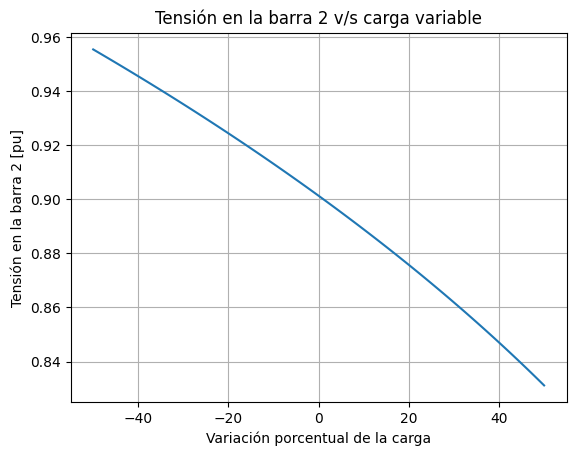

0.9554444547661931
0.9544687212087369
0.9534892167827457
0.9525059104295042
0.9515187706348204
0.9505277654197241
0.9495328623309275
0.9485340284310257
0.9475312302884378
0.9465244339670766
0.9455136050157376
0.9444987084572004
0.9434797087770306
0.9424565699120704
0.9414292552386129
0.9403977275602465
0.9393619490953545
0.9383218814642618
0.9372774856760193
0.9362287221148049
0.9351755505259366
0.9341179300014771
0.9330558189654189
0.9319891751584349
0.9309179556221775
0.9298421166831076
0.9287616139358441
0.9276764022260053
0.926586435632534
0.9254916674494781
0.9243920501672119
0.9232875354530751
0.9221780741314078
0.9210636161629561
0.9199441106236271
0.9188195056825662
0.91768974857953
0.9165547856015285
0.9154145620587035
0.9142690222594202
0.9131181094845311
0.9119617659607842
0.9107999328333399
0.9096325501373601
0.9084595567686246
0.9072808904531453
0.9060964877157265
0.9049062838474309
0.9037102128719006
0.9025082075104895
0.9013001991461498
0.9000861177860205
0.8988658920226

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandapower as pp
import math

#Para la creación de este modelo se asume un sistema trifásico, con voltaje linea-linea de 220[kV],
#analizamos el circuito equivalente para 1 fase 

#definimos los parámetros
f=50                          #frecuencia del sep
L=500                           #largo de la linea en [km]
r=0.02                          #resistencia de la linea en [ohm/km]
x=0.115                         #reactancia de la linea en [ohm/km]
b=19.1*10**(-9)*2*f*math.pi     #suceptancia shunt de la linea [S/km]
Vg_LN=500/math.sqrt(3)          #volateje de la linea en [kV]
Imax = 1                        #corriente maxima en las lineas [kV]
#respecto a la carga

Sc=1200/3                         #potencia aparente de la carga [MVA]
FP= 0.9                           #factor de potencia en la  carga
P=Sc*0.9                          #potencia activa en [Mw]
Q= math.sqrt((Sc**2)-(P**2))      #potencia reactiva en [Mvar]

# Crear red eléctrica
net = pp.create_empty_network()

# Añadir barras
bus1 = pp.create_bus(net, vn_kv=Vg_LN, name="Barra 1", slack=True)  # Barra 1 es el slack bus
bus2 = pp.create_bus(net, vn_kv=Vg_LN, name="Barra 2")

# Añadir líneas
pp.create_line_from_parameters(net, from_bus=bus1, to_bus=bus2, length_km=L, r_ohm_per_km=r, x_ohm_per_km=x, c_nf_per_km=b, max_i_ka=Imax)
pp.create_line_from_parameters(net, from_bus=bus1, to_bus=bus2, length_km=L, r_ohm_per_km=r, x_ohm_per_km=x, c_nf_per_km=b, max_i_ka=Imax)

# Añadir carga
pp.create_load(net, bus=bus2, p_mw=P, q_mvar=Q)

# Añadir una barra de generación externa (ext_grid) en la barra uno
pp.create_ext_grid(net, bus=bus1, vm_pu=1, va_degree=0.0)

# Se definen funcion lineal para variar carga y lista para almacenar tensión en barra 2
niveles_carga = np.linspace(0.5, 1.5, 101)
tensiones_barra_dos = []

# Se ejecuta el programa dentro del for para cada variación de carga
for carga in niveles_carga:
    net.load.loc[0, 'p_mw'] = P * carga
    net.load.loc[0, 'q_mvar'] = Q * carga

    pp.runpp(net)
    tension_barra_dos = net.res_bus.loc[1, 'vm_pu']
    tensiones_barra_dos.append(tension_barra_dos)

# Grafico de Tension, nivel de carga
plt.plot(niveles_carga*100-100, tensiones_barra_dos)
plt.xlabel('Variación porcentual de la carga')
plt.ylabel('Tensión en la barra 2 [pu]')
plt.title('Tensión en la barra 2 v/s carga variable')
plt.grid(True)
plt.show()

for tension in tensiones_barra_dos:
    print(tension)





In [2]:
import pandapower as pp
print(pp.__version__)

2.14.6
